## **와인 분류 결정트리 모델**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
redwine = pd.read_csv('csv/winequality-red.csv', sep=";")
whitewine = pd.read_csv('csv/winequality-white.csv', sep=";")

In [40]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [42]:
redwine["color"] = 1.0
whitewine["color"] = 0.0

In [43]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0


In [44]:
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0


In [45]:
wine = pd.concat([redwine, whitewine])
wine 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0


In [46]:
wine.reset_index(drop=True, inplace=True)

In [47]:
!pip install plotly

In [48]:
import plotly.express as px

In [49]:
data = wine.drop(['color'], axis =1)
target = wine['color']

In [50]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state = 13)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

wine_tree = DecisionTreeClassifier(max_depth = 4, random_state = 13)
wine_tree.fit(train_input, train_target)

y_pred_train = wine_tree.predict(train_input)
y_pred_test = wine_tree.predict(test_input)

print(accuracy_score(train_target, y_pred_train))
print(accuracy_score(test_target, y_pred_test))

0.9846065037521647
0.9830769230769231


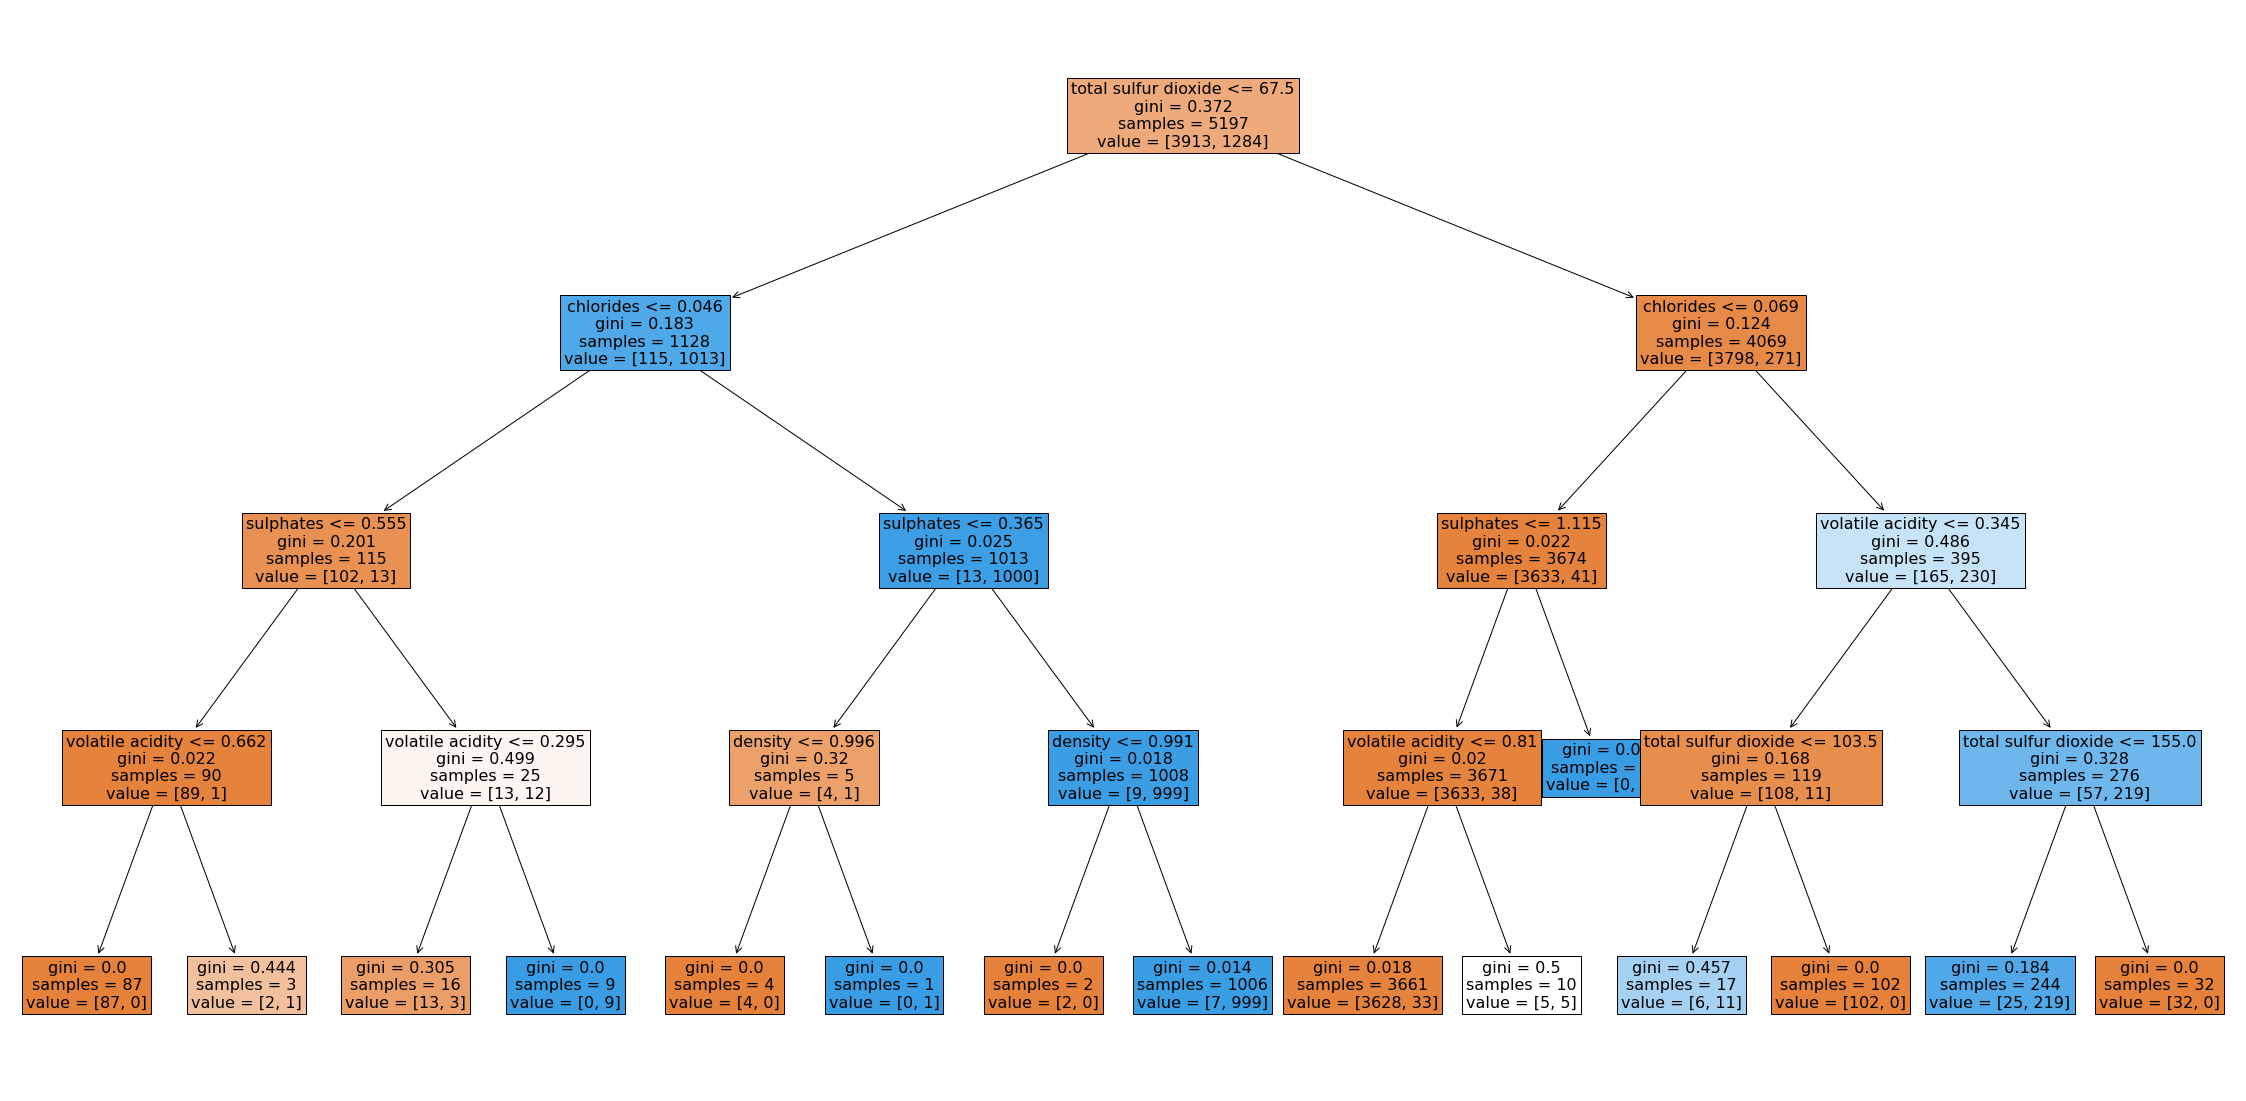

In [52]:
from sklearn.tree import plot_tree
feature_names = data.columns.tolist()
plt.figure(figsize = (40,20))
plot_tree(wine_tree, feature_names = feature_names , filled = True, fontsize = 16)
plt.show()

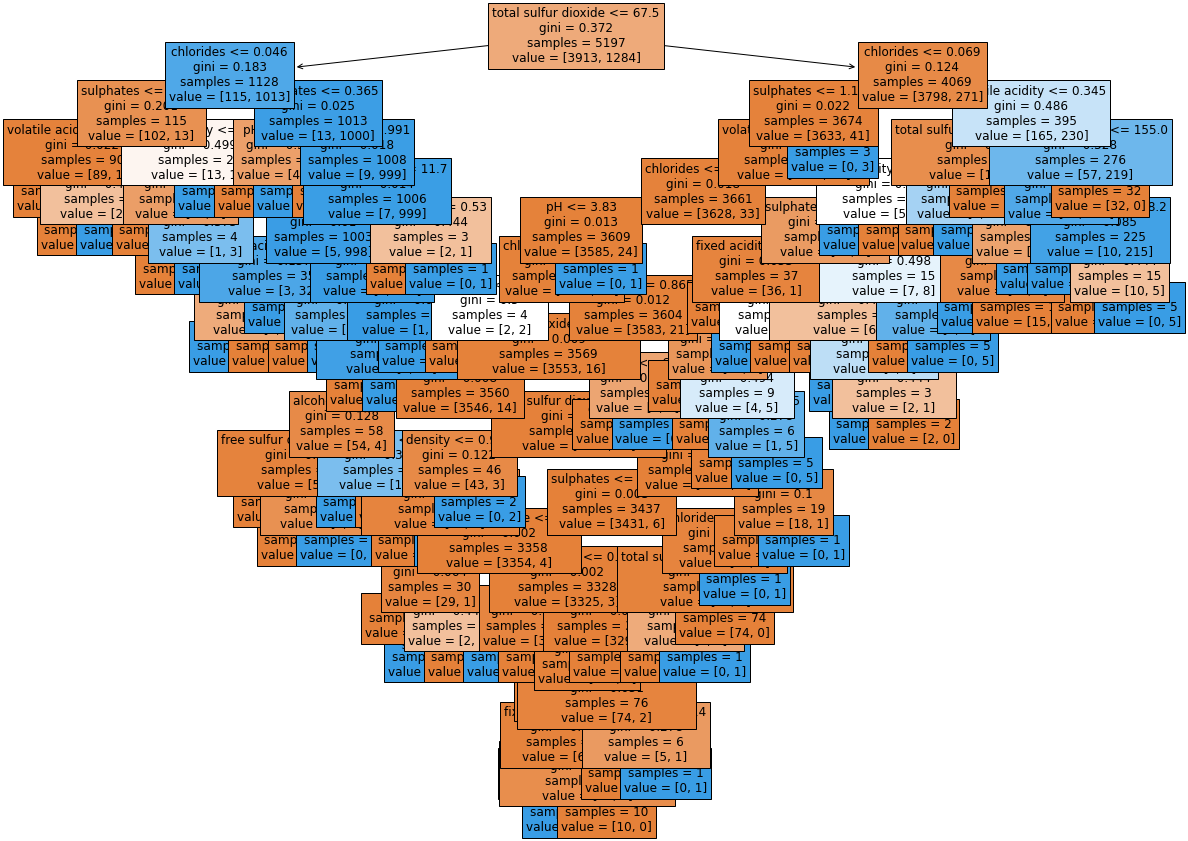

In [53]:
wine_dt = DecisionTreeClassifier(random_state = 13)
wine_dt.fit(train_input, train_target)

wine_pred_train = wine_dt.predict(train_input)
wine_pred_test = wine_dt.predict(test_input)

plt.figure(figsize = (20,15))
plot_tree(wine_dt, feature_names = feature_names , filled = True, fontsize = 12)
plt.show()


In [54]:
print(wine_dt.feature_importances_)

[0.00534754 0.05406279 0.00104387 0.0078279  0.21013245 0.00108911
 0.66368505 0.02282259 0.01276089 0.01500301 0.00375211 0.00247271]


In [55]:
#from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
print(classification_report(test_target, wine_pred_test))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       985
         1.0       0.97      0.97      0.97       315

    accuracy                           0.99      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.99      0.99      0.99      1300



## **트리 앙상블**
### **랜덤 포레스트**

#### **특성 중요도가 0.01 이상인 것들만 새로 추출해서 랜덤 포레스트 모델 만들기**

In [56]:
list1 = wine_dt.feature_importances_.tolist()
important_features = []
for i in list1:
    if i>= 0.01:
        important_features.append(i)
    else: 
        continue

print(important_features)

[0.054062790371738445, 0.2101324476697653, 0.6636850455721717, 0.022822585960129902, 0.012760890812543012, 0.015003007099717707]


In [57]:
wine.to_csv("wine.csv")

In [58]:
wine = pd.read_csv("csv/wine.csv")
wine_data = wine[['volatile acidity','chlorides','total sulfur dioxide', 'density', 'pH', 'sulphates']]
wine_target = wine['color']
wine_train_input, wine_test_input, wine_train_target, wine_test_target = train_test_split(wine_data, wine_target, test_size = 0.2, random_state = 13)
wine_rf.fit(wine_train_input, wine_train_target)
print(wine_rf.feature_importances_)

[0.16723649 0.31036376 0.35317247 0.0547136  0.02766178 0.0868519 ]


In [59]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
wine_rf = RandomForestClassifier(n_jobs = -1, random_state = 13)
scores = cross_validate(wine_rf, wine_train_input, wine_train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9998075882367438 0.9936505145480121


In [ ]:
#!pip install mglearn

#### **랜덤 포레스트 모델 시각화**

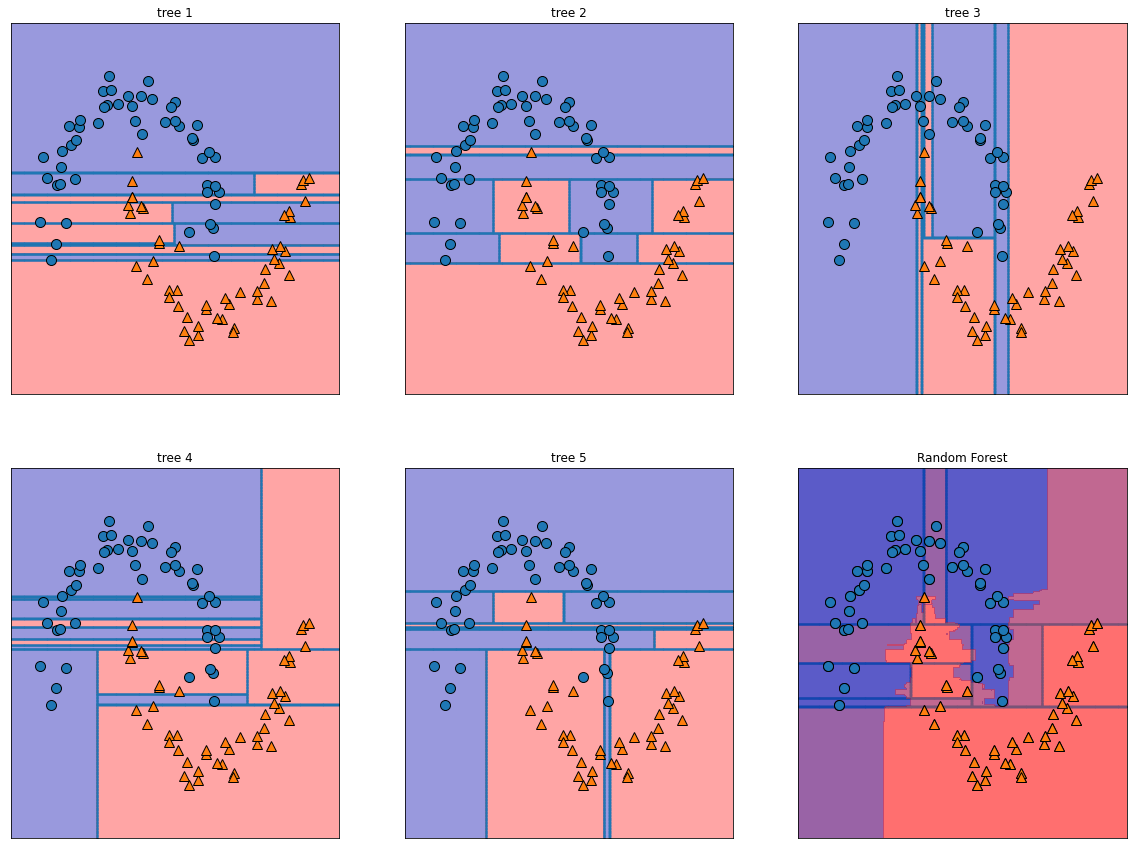

In [63]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn

wine_data, wine_target = make_moons(n_samples =100, noise = 0.1, random_state = 13)
wine_train_input, wine_test_input , wine_train_target, wine_test_target = train_test_split(wine_data, wine_target, stratify = wine_target, random_state = 13)

wine_rf.fit(wine_train_input, wine_train_target)
wine_pred_train = wine_rf.predict(wine_train_input)
wine_pred_test = wine_rf.predict(wine_test_input)


fig, axes = plt.subplots(2,3, figsize = (20,15))
for i , (ax, tree) in enumerate(zip(axes.ravel(), wine_rf.estimators_)):
    ax.set_title("tree {}".format(i+1))
    mglearn.plots.plot_tree_partition(wine_data, wine_target, tree, ax=ax)
    
    
mglearn.plots.plot_2d_separator(wine_rf, wine_data, fill=True, ax=axes[-1,-1], alpha= .4)
axes[-1,-1].set_title("Random Forest")
rf_model = mglearn.discrete_scatter(wine_data[:,0], wine_data[:,1], wine_target)

In [70]:
plt.figure(figsize=(20, 10))
plot_tree(wine_rf.estimators_[0], feature_names=wine_data.columns, class_names=wine_rf.classes_, filled=True)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 1440x720 with 0 Axes>

In [62]:
print(wine_rf.feature_importances_)

[0.46576571 0.53423429]


In [124]:
print(classification_report(wine_test_target, wine_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.80      1.00      0.89        12

    accuracy                           0.88        25
   macro avg       0.90      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25



**그래서 결론이 뭔데요??**

### **엑스트라 트리**
##### **OOB 샘플: 랜덤 포레스트 모델에서 훈련 세트에서 중복을 허용하여 부트 스트랩 샘플을 만들고 남은 샘플들을 의미한다**

In [131]:
#OOB score 출력하기
wine_rf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 13)
wine_rf.fit(wine_train_input, wine_train_target)
print(wine_rf.oob_score_)

#엑스트라 트리 모델
from sklearn.ensemble import ExtraTreesClassifier
wine_data_et = wine[['volatile acidity','chlorides','total sulfur dioxide', 'density', 'pH', 'sulphates']]
wine_target_et = wine['color']
wine_train_input_et, wine_test_input_et, wine_train_target_et, wine_test_target_et = train_test_split(wine_data_et, wine_target_et, test_size = 0.2, random_state = 13)
wine_et = ExtraTreesClassifier(n_jobs = -1, random_state = 13)
scores = cross_validate(wine_et, wine_train_input_et, wine_train_target_et, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9948046950163556
0.9998075882367438 0.9951899015325386


In [133]:
wine_et.fit(wine_train_input_et, wine_train_target_et)
print(wine_et.feature_importances_)

[0.19037502 0.18437242 0.36473253 0.10259018 0.0510599  0.10686995]


### **그레이디언트 부스팅**
##### **그레이디언트 부스팅은 깊이(depth)가 얕은 결정트리로 이전 트리의 오차를 보완하는 앙상블 방식이다**

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
wine_gb = GradientBoostingClassifier(random_state = 13)
scores = cross_validate(wine_gb, wine_train_input_et, wine_train_target_et, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9979796359878149 0.9913418967942549


In [137]:
wine_gb.fit(wine_train_input_et, wine_train_target_et)
print(wine_gb.feature_importances_)

[0.04799305 0.38833932 0.51720811 0.01552927 0.01132274 0.01960751]
